# CAP 5768 - Data Science - Dr. Marques - Fall 2020

# Assignment 4: Machine Learning
## STARTER CODE

### Goals 

- To learn how to implement a Data Science / Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy)
- To learn how to use perform linear regression by least squares using Python and scikit-learn.
- To appreciate that the same linear regression coefficients may be the best fit for dramatically different data distributions -- as illustrated by the Anscombe's quartet.
- To practice with different types of regularization (*lasso* and *ridge*) and understand when to use them.
- To learn how to implement several different machine learning classification models in Python 
- To learn how to evaluate and fine-tune the performance of a model using cross-validation
- To learn how to test a model and produce a set of plots and performance measures
- To expand upon the prior experience of manipulating, summarizing, and visualizing representative datasets  in data science and machine learning

### Instructions

- This assignment is structured in 3 parts, each using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- **The number of points is indicated next to each part. They add up to 100.**
- **There are additional (10 points worth of) bonus items**, which are, of course optional. 

### Important

- For the sake of reproducibility, use `random_state=0` (or equivalent) in all functions that use random number generation.
- It is OK to attempt the bonus points, but please **do not overdo it!** 


---------
### Imports + Google Drive

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.0 MB 167 kB/s
     |████████████████████████████████| 102 kB 11.5 MB/s 
     |████████████████████████████████| 690 kB 65.8 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 9.9 MB 29.8 MB/s 
     |████████████████████████████████| 4.7 MB 55.0 MB/s 
     |████████████████████████████████| 296 kB 80.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=325000 sha256=8f6d7fdedb9aa4d913ec0c7830caf2a6593f4a8b2754a4f75da0d0ad65244ca6
  Stored in directory: /tmp/pip-ephem-wheel-cache-kcncb6yg/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=d545b870907993cdc121eba257558ce67ec3f821e07dbdbef0a101e4cb7d2654
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss
from pandas_profiling import ProfileReport

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1: Regression Analysis


-----------
### 1a. Linear regression by least squares

In this part, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the *illiteracy* rate.

The Python code below plots the fertility versus illiteracy and computes the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

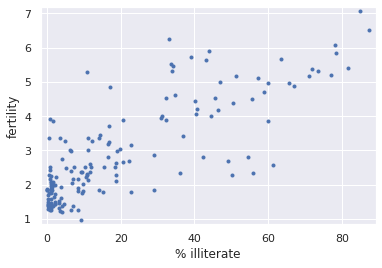

Pearson correlation coefficient between illiteracy and fertility: 0.80413


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/female_literacy_fertility.csv') 
# df = pd.read_csv('data/female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy']
fertility = df['fertility']

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('% illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print('Pearson correlation coefficient between illiteracy and fertility: {:.5f}'.format(pearson_r(illiteracy, fertility)))

In [ ]:
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


### 1.1 Your turn! (5 points)

We will assume that fertility is a linear function of the female illiteracy rate: `f=ai+b`, where `a` is the slope and `b` is the intercept. 

We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. 

The slope tells us how the fertility rate varies with illiteracy. 
We can find the best fit line .

Write code to plot the data and the best fit line (using `np.polyfit()`) and print out the slope and intercept.

In [ ]:
# ENTER YOUR CODE HERE
#p(x) = p[0] * x**deg + ... + p[deg]
#y= m*x^(1)+c
a = np.polyfit(illiteracy, fertility, 1)
#numpy.polyfit(x, y, deg)
slope = a[0]
intercept = a[1]
print("slope =",a[0] )
print("intercept =",a[1] )

slope = 0.04979854809063423
intercept = 1.8880506106365567


-------------------
### 1b. Anscombe's quartet

The Anscombe's quartet is a collection of four small data sets that have nearly identical simple descriptive statistics, yet have very different distributions. Each dataset consists of 11 `(x,y)` points. The quartet was created in 1973 by the statistician Francis Anscombe to demonstrate: the importance of visualization and exploratory data analysis (EDA), the effect of outliers and other influential observations on statistical properties, and the limitations of summary statistics (\*).

(\*) See https://heap.io/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story if you're interested.

The Python code below performs a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [ ]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

slope = 0.5000909090909094
intercept = 3.000090909090908


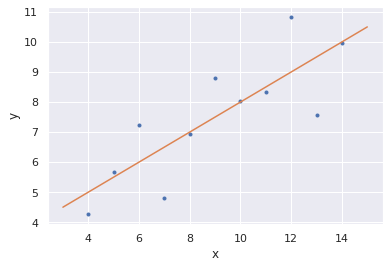

In [ ]:
# Perform linear regression: a, b
a, b = np.polyfit(x1, y1, 1)

# Print the slope and intercept
print('slope =', a)
print('intercept =', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### 1.2 Your turn! (5 points)

### Linear regression on all Anscombe data

Write code to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, i.e. compute the slope and intercept for each set. 

The data are stored in lists (`anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`), corresponding to the $x$ and $y$ values for each Anscombe data set.

In [ ]:
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]
# ENTER YOUR CODE HERE



ax_1 = np.polyfit(anscombe_x[0], anscombe_y[0], 1)
slope_1 = ax_1[0]
intercept_1 = ax_1[1]
print("slope1 =",ax_1[0],"intercept1 =",ax_1[1] )
ax_2 = np.polyfit(anscombe_x[1], anscombe_y[1], 1)
slope_2 = ax_2[0]
intercept_2 = ax_2[1]
print("slope2 =",ax_2[0],"intercept2 =",ax_2[1] )
ax_3 = np.polyfit(anscombe_x[2], anscombe_y[2], 1)
slope_3 = ax_3[0]
intercept_3 = ax_3[1]
print("slope3 =",ax_3[0],"intercept3 =",ax_3[1] )
ax_4 = np.polyfit(anscombe_x[3], anscombe_y[3], 1)
slope_4 = ax_4[0]
intercept_4 = ax_4[1]
print("slope4 =",ax_4[0],"intercept4 =",ax_4[1] )

slope1 = 0.5000909090909094 intercept1 = 3.000090909090908
slope2 = 0.5000000000000003 intercept2 = 3.00090909090909
slope3 = 0.49972727272727313 intercept3 = 3.0024545454545453
slope4 = 0.4999090909090908 intercept4 = 3.001727272727274


* slope1 = 0.5000909090909095 intercept1 = 3.000090909090909
* slope2 = 0.5000000000000004 intercept2 = 3.0009090909090896
* slope3 = 0.4997272727272731 intercept3 = 3.0024545454545453
* slope4 = 0.4999090909090908 intercept4 = 3.0017272727272735

* """Anscombe data has almost same slope and intercept """

-------------------
### 1c. Regression using scikit-learn

Now that we know the basics of linear regression, we will switch to scikit-learn, a powerful, workflow-oriented library for data science and machine learning.

The Python code below shows a simple linear regression example using scikit-learn. Note the use of the `fit()` and `predict()` methods.

[2.9776566]
-1.903310725531119


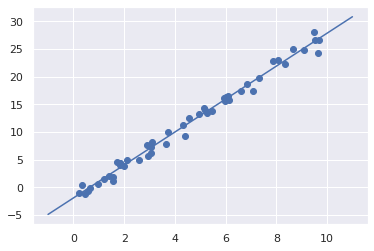

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data around the y = ax+b line where a=3 and b=-2
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 3 * x - 2 + rng.randn(50)

from sklearn.linear_model import LinearRegression

# Note: If you get a "ModuleNotFoundError: No module named 'sklearn'" error message, don't panic.
# It probably means you'll have to install the module by hand if you're using pip. 
# If you're using conda, you should not see any error message.

model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]
X.shape

model.fit(X, y)
print(model.coef_)
print(model.intercept_)

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

### 1d. Polynomial regression

One way to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take the multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

The code below shows a simple example of polynomial regression using the ``PolynomialFeatures`` transformer in scikit-learn. Concretely, it shows how we can use polynomial features with a polynomial of degree seven, i.e. $$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_7 x^7$$ 

It also introduces the notion of a *pipeline* in scikit-learn. "The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters." (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) 

The R^2 score for the fit is:  0.9806993128749489


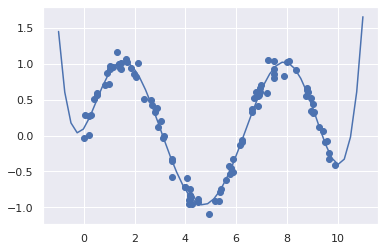

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print('The R^2 score for the fit is: ', poly_model.score(x[:, np.newaxis], y))

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### 1.3 Your turn! (10 points)

Write code to find the best degree/order for the polynomial basis functions (between 1 and 15) by computing the quality of the fit using a suitable metric, in this case the $R^2$ coefficient (which can be computer using the `score()` function). 

Remember that **the best possible score is 1.0**. The score can be negative (because the model can be arbitrarily worse). A score of 0 suggests a constant model that always predicts the expected value of y, disregarding the input features.

Hint: If you plot the score against the degree/order of the polynomial, you should see something like this:



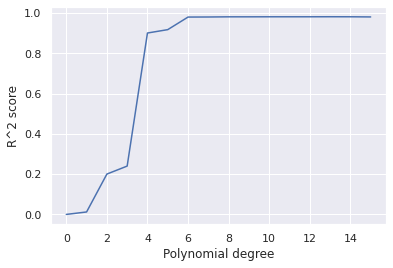

In [14]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

R_score=[]
for i in range(0, 16):
  poly_model = make_pipeline(PolynomialFeatures(i), LinearRegression())
  poly_model.fit(x[:, np.newaxis], y)
  yfit = poly_model.predict(xfit[:, np.newaxis])
  R_score.append(poly_model.score(x[:, np.newaxis], y))

R_score
plt.plot(R_score)
plt.ylabel("R^2 score")
plt.xlabel("Polynomial degree")
plt.show()

### 1e. Regularization

The use of polynomial regression with high-order polynomials can very quickly lead to over-fitting. In this part, we will look into the use of regularization to address potential overfitting.

The code below shows an attempt to fit a 15th degree polynomial to a sinusoidal shaped data. The fit is excellent ($R^2$ > 0.98), but might raise suspicions that it will lead to overfitting.

0.9810106927307879


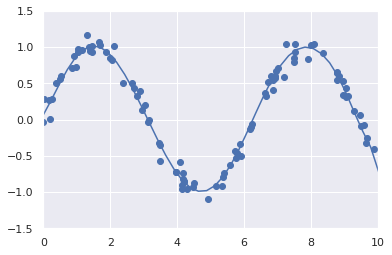

In [15]:
model = make_pipeline(PolynomialFeatures(15), LinearRegression())

model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

### 1.4 Your turn! (5 points)

Write Python code to perform Ridge regression ($L_2$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator. 
2. In the beginning, use all default values for its parameters.
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

0.9922588607527568


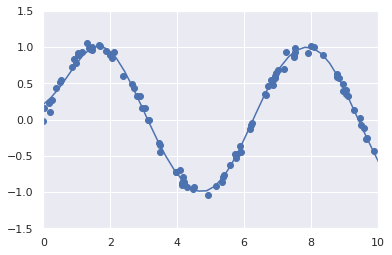

In [16]:
# ENTER YOUR CODE HERE

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.05 * rng.randn(100)

from sklearn.linear_model import Ridge

Ridge_model = make_pipeline(PolynomialFeatures(15), Ridge())
Ridge_model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, Ridge_model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = Ridge_model.score(x[:, np.newaxis], y)
print(score)

### 1.5 Your turn! (5 points)

Write Python code to perform Lasso regression ($L_1$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Lasso`` estimator. 
2. In the beginning, use `Lasso(alpha=0.1, tol=0.2)`
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

In [ ]:
# ENTER YOUR CODE HERE

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

from sklearn.linear_model import Lasso

lasso_model = make_pipeline(PolynomialFeatures(15), Lasso(alpha=0.1, tol=.1))
lasso_model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, lasso_model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)

score = lasso_model.score(x[:, np.newaxis], y)
print(score)

### 1f. The housing problem
The Boston housing dataset is a classic dataset used in linear regression examples.
(See https://scikit-learn.org/stable/datasets/index.html#boston-dataset for more)

The Python code below:
- Loads the Boston dataset (using scikit-learn's `load_boston()`) and converts it into a Pandas dataframe
- Selects two features to be used for fitting a model that will then be used to make predictions: LSTAT (% lower status of the population) and RM (average number of rooms per dwelling) (\*)
- Splits the data into train and test sets

(\*) See https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 for details.

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

In [ ]:
boston['MEDV'] = boston_dataset.target
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#### (OPTIONAL EDA)

The (innocent-looking) lines of code below use Pandas Profiling to produce rich reports, plots and insights on the dataset.

Read more about it:

*   https://pypi.org/project/pandas-profiling/ 
*   https://www.datacourses.com/pandas-1150/ 
*   https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html 
*   https://medium.com/analytics-vidhya/pandas-profiling-5ecd0b977ecd  

In [ ]:
# fun with pandas_profiling
profile = ProfileReport(boston, title='Pandas Profiling Report for Boston Housing Dataset', explorative=True)

In [ ]:
profile.to_notebook_iframe()

### 1.6 Bonus! (10 points)

Write Python code to:

1. Fit a linear model to the data.
2. Compute and print the RMSE and $R^2$ score for both train and test datasets.
3. Fit a polynomial model (of degree 4) to the data.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.
5. Apply Ridge regression to the polynomial model.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.

In [ ]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

-------------------
## Part 2: Classification

### 2a. The Iris dataset 

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

#### Histograms, pair plots and summary statistics 

The code below:

1. Computes and displays relevant summary statistics for the whole dataset.
2. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset. 

In [ ]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Display summary statistics for the whole dataset
iris.describe()

### 2.1 Your turn! (15 points)
Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
2. Plot the resulting decision tree. 
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. 


In [ ]:
# ENTER YOUR CODE HERE

from sklearn.datasets  import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#                                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
#                                           max_features=None, random_state=None, max_leaf_nodes=None, class_weight=None, presort=False)


iris = sns.load_dataset("iris")
sns.reset_orig() # reset to orginal data set

# sns data into np
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names']) 
df['target'] = iris['target'] #Original Pandas df (features + target)

#75% of the data into a training set and 25% of the data into a test set.
X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names], df['target'], random_state=0) 

# Make an instance of the Model
classified_tree = DecisionTreeClassifier()

#Predict labels of unseen (test) data
classified_tree.fit(X_train, Y_train) 

#labelling
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

#add graphics to tree image
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

#plot tree
tree.plot_tree(classified_tree,feature_names = fn, class_names=cn, filled = True); # ; need otherwise so many texts

#tree.plot_tree(classified_tree); # plot withoiut labeling 



### 2b. Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. 

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [ ]:
from keras.datasets import mnist # load data set

# Model / data parameters
num_classes = 10  # 0-10 number as classes
input_shape = (28, 28, 1)  # pixes 28*28 1 = gray cycle (blck and white) 

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()   # y_train = output , xtrain images , x valid - to check , 

In [ ]:
X_train.shape

In [ ]:
y_train.shape # labels 60000

In [ ]:
#tranign set interm of numbers
y_train[0:12]  #just for view

In [ ]:
#traning set interm of picutres / numbers  # just for view
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

In [ ]:
y_valid.shape

In [ ]:
y_valid[0]

In [ ]:
#validation test
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
X_valid[0].max() # 8 bit images 0-225

In [ ]:
# Reshape (flatten) images 
#28*28 = 784
#convert images to float32
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')  # data feeding method, 
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
''' 8 bit images normalization X_train_scaled_reshaped value is between 0-1 (because diveided by 255)'''
X_train_scaled_reshaped = X_train_reshaped / 255    
X_valid_scaled_reshaped = X_valid_reshaped / 255    

# Renaming for conciseness
X_training = X_train_scaled_reshaped 
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

In [ ]:
# convert class vectors to binary class matrices
''' singale valvue "8" making a catogorical vector [one hot conversion] see below '''
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])
''' [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] = 8th number so "8" '''

### 2.2 Your turn! (10 points)

Write code to: 

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

Hint: your accuracy will be around 83.5%

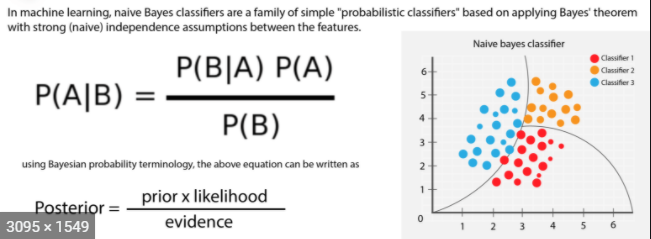

In [ ]:
# ENTER YOUR CODE HERE
#Naive Bayes calssificatioin 
from sklearn.naive_bayes import MultinomialNB 

NBclassifier = MultinomialNB() 
NBclassifier.fit(X_training , y_train) # categorize 

predicted_labels = NBclassifier.predict(X_validation) # predict 

In [ ]:
predicted_labels

In [ ]:
predicted_labels.shape

In [ ]:
# ENTER YOUR CODE HERE

from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_valid , predicted_labels)

#sns.heatmap(matrix.T, fmt='d', cmap="YlGnBu", cbar=False, square=True, annot=True)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d',cbar=False, cmap="YlGnBu")

plt.xlabel('true label')
plt.ylabel('predicted label')


print(matrix)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, predicted_labels)

### 2.3 Your turn! (10 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. 

Hint: your accuracy should be > 90%

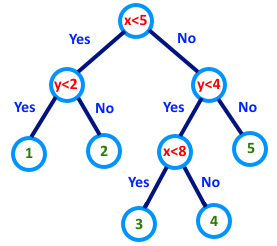

In [ ]:

from sklearn.ensemble import RandomForestClassifier
RFClassified_model = RandomForestClassifier(random_state=0)

RFClassified_model.fit(X_training , y_train)  #catagorizing

predicted_labels2 = RFClassified_model.predict(X_validation) # predict 

In [ ]:
# ENTER YOUR CODE HERE

from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix2 = confusion_matrix(y_valid , predicted_labels2)

#sns.heatmap(matrix.T, fmt='d', cmap="YlGnBu", cbar=False, square=True, annot=True)
sns.heatmap(matrix2.T, square=True, annot=True, fmt='d',cbar=False, cmap="YlGnBu")

plt.xlabel('true label')
plt.ylabel('predicted label')


print(matrix2)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, predicted_labels2)

### 2.4 Your turn! (10 points)

Write code to: 

1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. 

Hint: A variation of the Random Forests classifier from 2.2 above is acceptable. In that case, document your selection of (hyper)parameters and your rationale for choosing them.

In [ ]:
print(type(y_train))

In [ ]:
from sklearn import datasets, svm, metrics

param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C,gamma=param_gamma)


########################################################
# Now predict the value of the test
expected = y_valid

classifier.fit(X_training , y_train) 

predicted_labels = classifier.predict(X_validation)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix2 = confusion_matrix(y_valid , predicted_labels)

#sns.heatmap(matrix.T, fmt='d', cmap="YlGnBu", cbar=False, square=True, annot=True)
sns.heatmap(matrix2.T, square=True, annot=True, fmt='d',cbar=False, cmap="YlGnBu")

plt.xlabel('true label')
plt.ylabel('predicted label')
print(matrix2)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, predicted_labels)

more info: https://github.com/ksopyla/svm_mnist_digit_classification/blob/master/svm_mnist_classification.py

## Part 3: Face Recognition using PCA (eigenfaces)

In this part you will build a face recognition solution.

We will use a subset of the Labeled Faces in the Wild (LFW) people dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

The Python code below loads a dataset of 1867 images (resized to 62 $\times$ 47 pixels) from the dataset and displays some of them.

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

In [ ]:
plt.rcParams["figure.figsize"]=15,15
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#### 3.1 Your turn! (15 points)

Write code to: 

1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components. 
2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced  features. 
3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix. 
4. Display examples of correct and incorrect predictions (at least 5 of each). 

* svm classifier
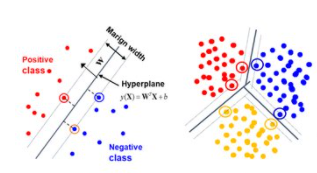

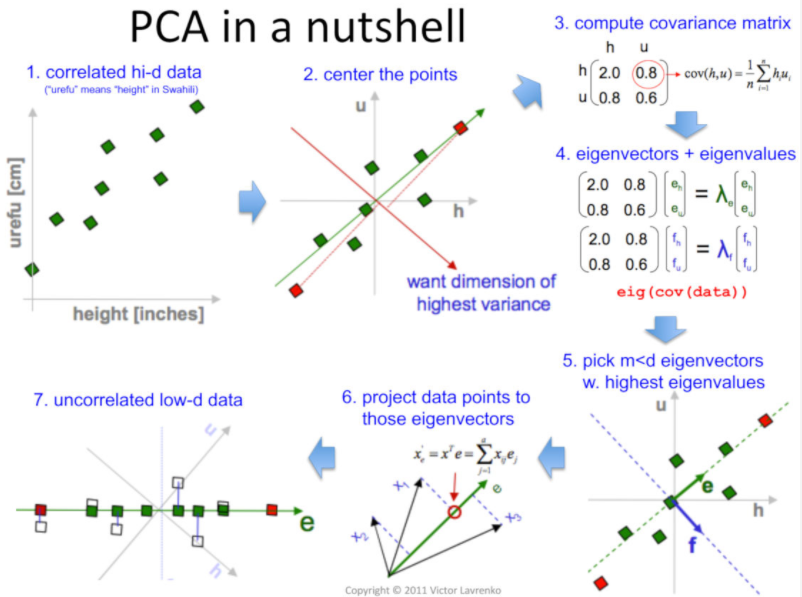

In [ ]:
# ENTER YOUR CODE HERE

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=120, random_state=0, whiten=True)
svc = SVC(kernel='rbf', C=1.0, class_weight='balanced')
svc_model = make_pipeline(pca, svc)

pca.fit(faces.data)


In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(faces.data, faces.target, 
                                                              random_state=0)

In [ ]:
svc_model.fit(X_train2, y_train2)

In [ ]:
y_fit =svc_model.predict(X_valid2) #fitting

In [ ]:
#fitting and dispay
plt.rcParams["figure.figsize"]=10,10
fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_valid2[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_fit[i]].split()[-1], 
                   color='black' if y_fit[i]==y_valid2[i] else 'red')

''' wrong predictions are in red '''

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_valid2, y_fit, target_names=faces.target_names))

In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix3 = confusion_matrix(y_valid2 , y_fit)

#sns.heatmap(matrix.T, fmt='d', cmap="YlGnBu", cbar=False, square=True, annot=True)
sns.heatmap(matrix3.T, square=True, annot=True, fmt='d',cbar=False, cmap="YlGnBu")

plt.xlabel('true label')
plt.ylabel('predicted label')


print(matrix3)

### Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

Things I learned 


* To perform linear regression and non linear regression using numpy
* To perform linear regression and non linear regression using sklearn
* sklearn Lasso regression parameters
* panda profiling
* classification methods (DecisionTreeClassifier / MultinomialNB /RandomForestClassifier )
* validation sets and trainging set 
* How to train data over differnt methods 
* How to validate data
* diffrence between DecisionTreeClassifier / MultinomialNB /RandomForestClassifier )
* Component Analysis (PCA) 
* multi-class SVM classifier
* Display correct and incorrect predictions for SVM classifier


The most interesting part was to divide the data into a training set and a validation set. The time-consuming part was to understand the code and how the classification methods work. The enlightening part was to understan difference between each classification methods, and the tedious part is to manipulate codes.
I would pay more attention to the mathematics side of each classification method.

In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to html nkumarachchi2019_CAP5768_Fall2020_Assignment4_STARTER.ipynb
